<a href="https://colab.research.google.com/github/Ekho852/Python/blob/main/Sift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of Keypoints Detected In The Training Image:  51
Number of Keypoints Detected In The Query Image:  51


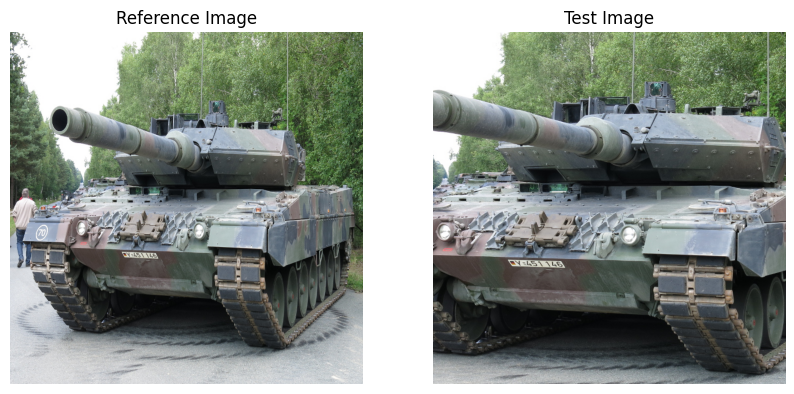

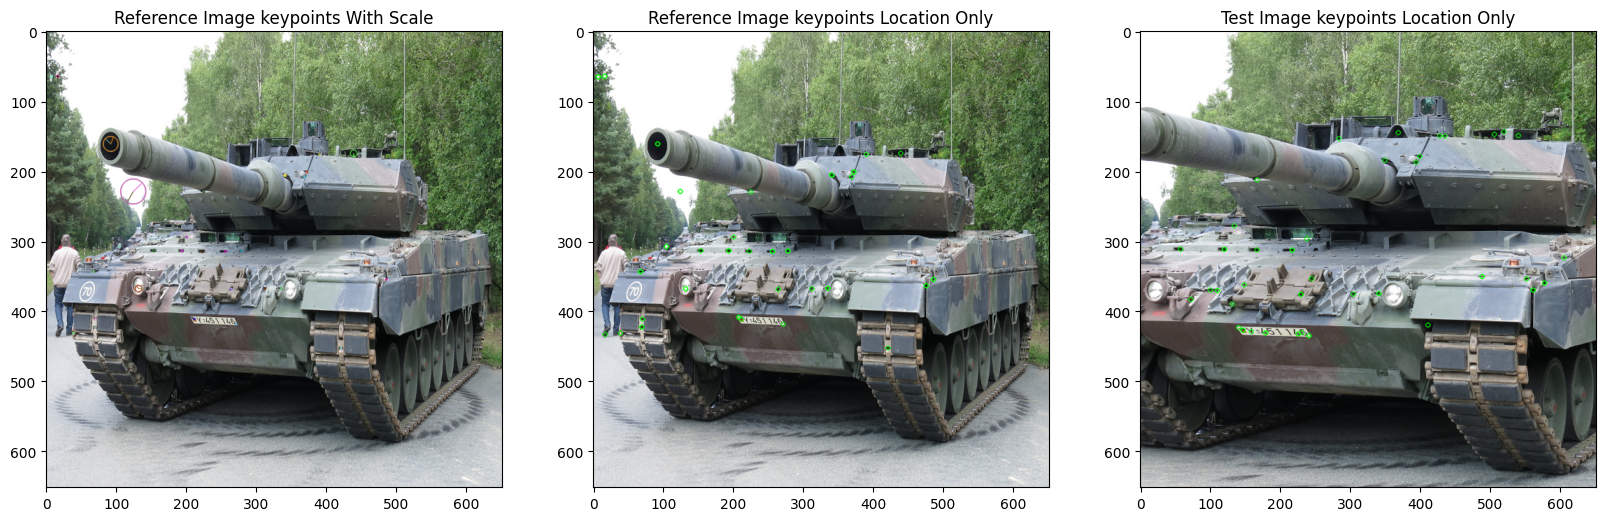

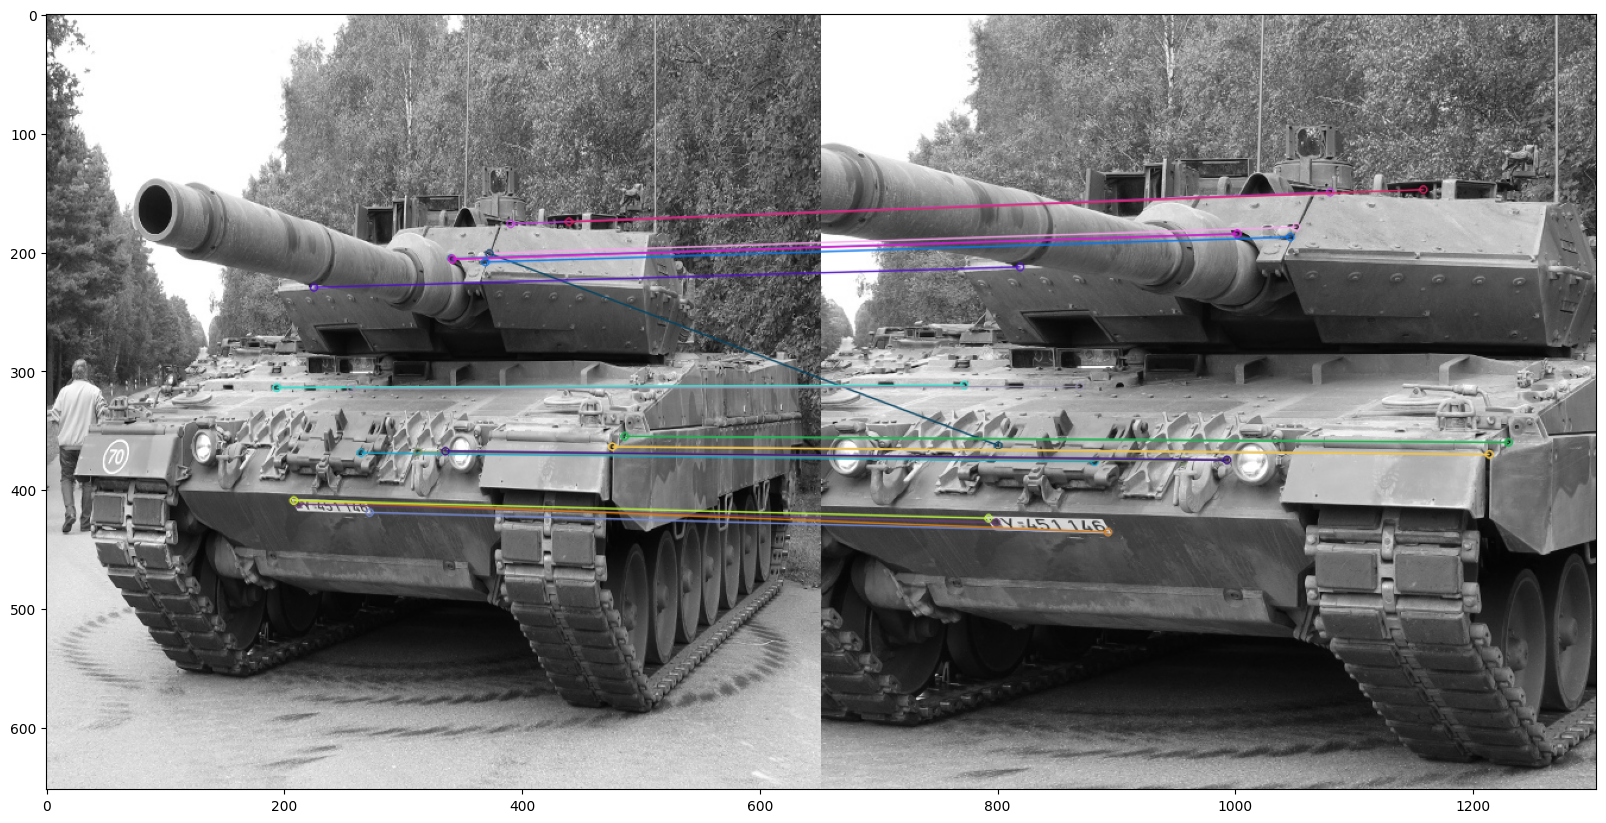

(<matplotlib.image.AxesImage at 0x7ea888b0b2b0>, None)

In [7]:
import numpy as np
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits import mplot3d
from scipy import signal

def url_to_image(url):
	resp = urllib.request.urlopen(url)
	temp_image = np.asarray(bytearray(resp.read()), dtype="uint8")
	temp_image = cv2.imdecode(temp_image, cv2.IMREAD_COLOR)
	temp_image = cv2.cvtColor(temp_image, cv2.COLOR_BGR2RGB) # OpenCV defaults to BGR, but we need RGB here..
	return temp_image

#Function to
def read_images():
    image = url_to_image(image_url)
    x,y,z = np.shape(image)
    # Take Centre Crop (zoomed image)
    x_trg = int(x*scale_factor)
    y_try = int(y*scale_factor)
    bdx = int((x-x_trg)//2)
    bdy = int((y-x_trg)//2)
    image_crop = image[bdx:x-bdx,bdy:y-bdy]
    # Resize original iamge to match cropsize.
    x,y,z = np.shape(image_crop)
    image_scale = cv2.resize(image, dsize=(y, x), interpolation=cv2.INTER_CUBIC)
    return image_scale,image_crop

# Image ULR (This can be changed to any image)
#image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Monarch_butterfly_in_BBG_%2884685%29.jpg/1280px-Monarch_butterfly_in_BBG_%2884685%29.jpg"
image_url = "https://upload.wikimedia.org/wikipedia/commons/5/5d/Leopard_2_A7.JPG"

#Read in images
scale_factor = 0.85
ref_image,test_image = read_images()

# Plot reference and test images
f, axarr = plt.subplots(1,2,figsize=(10,20))
axarr[0].imshow(ref_image)
axarr[0].axis('off')
axarr[0].title.set_text('Reference Image')
axarr[1].imshow(test_image)
axarr[1].axis('off')
axarr[1].title.set_text('Test Image')

# Convert images to grey scale
img1 = cv2.cvtColor(ref_image, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Initiate SIFT
sift = cv2.xfeatures2d.SIFT_create(nfeatures=50)
# find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

keypoints_without_size = np.copy(ref_image)
testkp_without_size = np.copy(test_image)
keypoints_with_size = np.copy(ref_image)

cv2.drawKeypoints(ref_image, kp1, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(test_image, kp2, testkp_without_size, color = (0, 255, 0))
cv2.drawKeypoints(ref_image, kp1, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Display image with and without keypoints size
fx, plots = plt.subplots(1, 3, figsize=(20,10))

plots[0].set_title("Reference Image keypoints With Scale")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Reference Image keypoints Location Only")
plots[1].imshow(keypoints_without_size, cmap='gray')

plots[2].set_title("Test Image keypoints Location Only")
plots[2].imshow(testkp_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(kp1))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(kp2))

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,20))
plt.imshow(img3),plt.show()
#See the result below: